# Text Classification using Scikit-learn

## Overview
In this example we will use scikit-learn to train a Naive Bayes classifier using the 20 news groupd data set that is built into scikit-learn.

## Resources
Below is the resources that we used to put together this example:
- https://scikit-learn.org/
- https://scikit-learn.org/0.16/datasets/index.html
- https://seaborn.pydata.org/
- Book : Python Machine Learning By Example - Second Edition by Yuxi Liu

## Getting Started

In [1]:
!pip install sklearn seaborn

     |████████████████████████████████| 215kB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 9.9MB/s eta 0:00:01
     |████████████████████████████████| 10.2MB 9.6MB/s eta 0:00:01
     |████████████████████████████████| 27.7MB 978kB/s eta 0:00:01
     |████████████████████████████████| 296kB 910kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=da7de31eb3e453c8cae3f00718599e508e1b0f93d297e9866ffb80eb54159a99
  Stored in directory: /Users/stuartgreenlees/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


## Step 1: Load Training Data

"20 Newsgroup" - Scikit built in data set

- https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups 
- https://github.com/scikit-learn/scikit-learn/blob/a95203b/sklearn/datasets/twenty_newsgroups.py#L151

In [4]:
from sklearn.datasets import fetch_20newsgroups

# Use 4 of the 20 categories
sub_catergory_list = ['rec.autos', 'rec.motorcycles',
                      'rec.sport.baseball','rec.sport.hockey']

# Get training data
training_data = fetch_20newsgroups(subset='train', 
                                   categories=sub_catergory_list, 
                                   shuffle=True)

print('Training Categories:', list(training_data.target_names))
print('Total Training Data:', len(training_data.data))

Training Categories: ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
Total Training Data: 2389


## Step 2: Data Analysis
It’s good to get an understanding of your dataset. In relation to multiple classifications categories, it is important to know the distribution of the categories so categories are then not under or overrepresented.

<function matplotlib.pyplot.show(*args, **kw)>

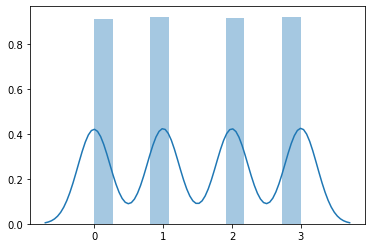

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(training_data.target)
plt.show

## Step 3 - Converting Text to Vectors
To feed predictive models with text data, we first most turn text into vectors of numerical values suitable for statistical analysis.

We will use scikit-learn 'CountVectorizer' to create feature vectors -
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [6]:
def clean_data(test):
    training_data_cleaned = []
    for data in training_data.data:
        data_cleaned = ' '.join(word for word in data.split() 
                            if letter_only(word))
        training_data_cleaned.append(data_cleaned)
    
    return training_data_cleaned
    
def letter_only(word):
    for character in word:
        if not character.isalpha():
            return False
    return True

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import stop_words

# To ensure we don't have numbers included in our feature words we will remove them.
training_data_cleaned = clean_data(training_data)

# Create count vectorizers with cleaned data and remove stop words. 
count_vectorizer = CountVectorizer(stop_words="english", max_features=5000)
x_training_count =  count_vectorizer.fit_transform(training_data_cleaned)

print('Document-Term Matrix:' + '[n_samples, n_features]: ', x_training_count.shape)

list = count_vectorizer.get_feature_names()
print(list[:5])

/Users/stuartgreenlees/opt/anaconda3/envs/aicon-2019-tesseract/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


Document-Term Matrix:[n_samples, n_features]:  (2389, 5000)
['aa', 'aaa', 'aamir', 'aaron', 'ab']


## Step 4: Convert Count Matrix to normalised tf-idf

__Tf__ : term-frequency, prevent giving longer text documents more weightage than shorter documents.

__tf-idf__ : term-frequency - inverse document-frequency, intended to reflect how important a word <br> is to a document in a corpus.  

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
x_training_tfidf = tfidf_transformer.fit_transform(x_training_count)

print('Document-Term Matrix: [n_samples, n_features_new]', x_training_tfidf.shape)

Document-Term Matrix: [n_samples, n_features_new] (2389, 5000)


## Step 5: Build NBclassifier (Naive Bayes) - Train Classifier

We will use the MultinomialNB which implements the NB algorithm for multinomially distributed data.

- https://scikit-learn.org/stable/modules/naive_bayes.html
- https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

We use the MultinomialNB which implements the NB alogorithm for multinomially distributed data.

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Fit the classifier according to x (training vectors) and y (target values)
classifier = MultinomialNB().fit(x_training_tfidf, training_data.target) 

## Step 3 - 5 can be replaced by using a sklearn pipeline

In [11]:
from sklearn.pipeline import Pipeline
text_classifier = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
classifier = text_classifier.fit(training_data.data, training_data.target)

## Step 6: Test Built Classifier
Get test data from the 20 News Group data set (same categories as training data) 

In [14]:
import numpy as np

testing_data = fetch_20newsgroups(subset='test', categories=sub_catergory_list, shuffle=True, download_if_missing=False)

print('Total Testing Data:', len(testing_data.data))

# Transform Test data vectors 
x_testing_count = count_vectorizer.transform(testing_data.data)
x_testing_tfidf = tfidf_transformer.fit_transform(x_testing_count)

# Perform prediction on test data 
predictions = classifier.predict(x_testing_tfidf)
np.mean(predictions == testing_data.target)

Total Testing Data: 1590


0.9465408805031447

In [15]:
# Perform prediction on test data 
predictions = classifier.predict(x_testing_tfidf)

np.mean(predictions == testing_data.target)

0.9465408805031447

## Step 7: Evaluate Classifier Model

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(testing_data.target, predictions)
metrics_report = classification_report(testing_data.target,  predictions)
cm = confusion_matrix(testing_data.target, predictions)

In [17]:
print("Accuracy rate: " + str(round(accuracy, 2)) + "\n")
print("Confusion Matrix Summary \n\n", cm)
print("Report: \n\n", metrics_report)

Accuracy rate: 0.95

Confusion Matrix Summary 

 [[373  14   6   3]
 [ 22 370   6   0]
 [  3   2 377  15]
 [  1   8   5 385]]
Report: 

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       396
           1       0.94      0.93      0.93       398
           2       0.96      0.95      0.95       397
           3       0.96      0.96      0.96       399

    accuracy                           0.95      1590
   macro avg       0.95      0.95      0.95      1590
weighted avg       0.95      0.95      0.95      1590



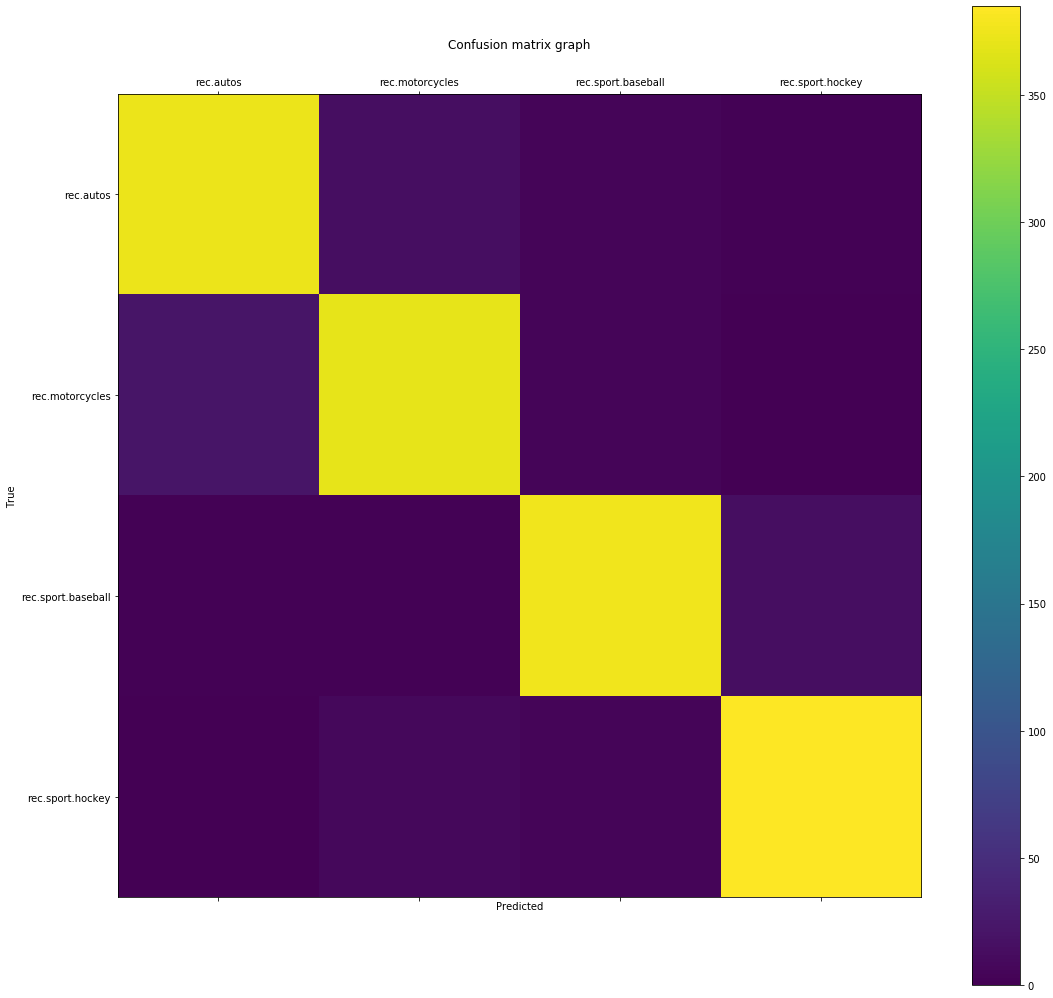

In [18]:
plt.rcParams["figure.figsize"] = [18,18]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix graph')
fig.colorbar(cax)
ax.set_xticklabels([''] + training_data.target_names)
ax.set_yticklabels([''] + training_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Classify John's Invoice Document

In [19]:
extracted_auto = "Small Auto Parts Supplier Rep Supplier Katie Russ, Payment Terms Due Date Due on receipt 02-12-2019 Qty Description 1 Wheel 2 Wax 1 Battery 2 Headlight bulb 1 Clutch INVOICE Date: 01-01-2019 INVOCE#100 John Smith, Smith's Automobiles 100 Long Roadway, Belfast BT32 QQU 028 90 222222 Customer ID ABC12345 Address 23 Seymour Drive Lisburn Northern Ireland Unit Price £40.00 £10.00 £55.00 £8.00 £140.00 Subtotal Sales Tax Total Make all checks payable to Sample Test Invoice Thank you for your business! TOTAL £40.00 £20.00 £55.00 £16.00 £140.00 £271.00 £120.00 £391.00"
extracted_moto = "Big Bike Parts Supplier Rep Supplier Seamus White Big Bike Parts Payment Terms Due Date Due on receipt 12.23.2019 Qty Description 1 Wheel 2 Wax 1 Battery 2 Headlight bulb 1 Motorcycle Fork INVOICE Date: 01/01/2019 INVOICE # 100 John Smith Smith’s Automobiles 100 Long Roadway, Belfast, Co. Antrim, BT32 QQU 028 90 222222 Customer ID ABC12345 Address 55 Prospect Drive, Belfast, Co. Antrim Unit Price £40.00 £10.00 £55.00 £8.00 £140.00 Subtotal Sales Tax Total Make all checks payable to Sample Test Invoice Thank you for your business! Line Total £40.00 £20.00 £55.00 £16.00 £140.00 £271.00 £120.00 £391.00"

In [ ]:
extracted_data_list = [extracted_auto, extracted_moto]

test_count = count_vectorizer.transform(extracted_data_list)
test_tfidf = tfidf_transformer.fit_transform(test_count)

In [ ]:
test_predicition = classifier.predict(test_tfidf)

for t in test_predicition:
    print(training_data.target_names[t])